In [30]:
# this notebook continues use of the stream power/abrasion/grain attrition model
# in this notebook we test to see if our model behaves "as expected" when tweaking dimenionless coefficients
# we also try representing multiple bedrock erodibilites by varying the spatial thickness of alluvium

In [31]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# copy over theory stuff to remind us what our equations mean/where they come from

### Goal: non-dimensionalize these equations, come up with reasonable scales, simplify the parameter space, and plot changes to channel profile as we move through that space

1. Here are our basic equations. If we can make the terms on the righthand side dimensionless, then the solution will also be dimensionless.

> $$ \eta = \eta_b + H \hspace{1cm} \rightarrow \hspace{1cm} \frac{\partial \eta}{\partial t} = \frac{\partial \eta_b}{\partial t} + \frac{\partial H}{\partial t}$$

2. We start by defining dimensionless versions of our major variables - vertical height (3 terms here - the total height $\eta$, the bedrock height $\eta_b$, and the alluvial thickness $H$), horizontal position ($x$), and time ($t$). We do this by dividing each of these variables by a scale that has the same dimension (either length or time) as the variable that we seek to non-dimensionalize. We'll worry about defining what the scales for horizontal position and time should be later. Our equations above have already have already introduced a handy scale for vertical height ($H^*$), so we use that for our vertical height scale here.

>$$\eta' = \frac{\eta}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} \eta = \eta'H^*$$

>$$\eta_b' = \frac{\eta_b}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} \eta_b = \eta_b'H^*$$

>$$H' = \frac{H}{H^*} \hspace{1cm} \rightarrow \hspace{1cm} H = H'H^*$$

>$$x' = \frac{x}{l} \hspace{1cm} \rightarrow \hspace{1cm} x = x'l$$

>$$t' = \frac{t}{T} \hspace{1cm} \rightarrow \hspace{1cm} t = t'T$$

3. We'll start by working on the bedrock bit. From above,

> $$\frac{\partial \eta_b}{\partial t} = - E_\text{total} = -(kqS + \beta q_s)$$

> For ease of LaTeX-ing, I've left off the "e-factor." It shouldn't make a difference in our non-dimensionalizing anyway because it's already dimensionless. I'll also drop the minus sign and just add it back in at the end, just so I don't have to keep typing out parentheses around everything.

4. We'll start with a few substitutions:

> $$q = rx$$
> Unit discharge $[L^2/T]$ is equal to a runoff rate multiplied by distance downstream

>$$S = \frac{\partial \eta}{\partial x}$$
> Slope is equal to the change in total elevation over a distance

>$$q_s = cqS \hspace{1cm} \rightarrow \hspace{1cm} q_s = crx\frac{\partial \eta}{\partial x}$$
> Bed sediment flux is equal to the discharge times slope times some factor that determines the fraction carried as bed sediment (function of grain size, roughness, etc). This equation should also be multiplied by the "e-factor," but again we'll skip that for now.

5. So now we have:
> $$\frac{\partial \eta_b}{\partial t} = krx\frac{\partial \eta}{\partial x} + \beta crx\frac{\partial \eta}{\partial x}$$

6. Now time for a bunch of substitutions. Any place where we see one of our major dimensional variables, we want to replace it with its non-dimensional form.

> $$\frac{\partial \eta_b'H^*}{\partial t'T} = krx'l\frac{\partial \eta'H^*}{\partial x'l} + \beta crx'l\frac{\partial \eta'H^*}{\partial x'l}$$

7. Now pull constants out of derivatives:

> $$\frac{H^*}{T} \frac{\partial \eta_b'}{\partial t'} = \frac{H^*}{l}krx'l\frac{\partial \eta'}{\partial x'} + \frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

8. Now rearrange to isolate the derivative on the lefthand side:

> $$\frac{\partial \eta_b'}{\partial t'} = \frac{T}{H^*}\frac{H^*}{l}krx'l\frac{\partial \eta'}{\partial x'} + \frac{T}{H^*}\frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

9. And cancel a bunch of stuff!

> $$\color{blue}{\frac{\partial \eta_b'}{\partial t'} = Tkrx'\frac{\partial \eta'}{\partial x'} + T\beta crx'\frac{\partial \eta'}{\partial x'}}$$

> Wahoo! We can check that these are all dimensionless terms now by recalling the dimensions of each variable and making sure they all cancel for both terms on the righthand side. Reminder: $k = [1/L]$ in our case.

> But, TRUCKERS, YOU ARE NOT DOWN YET. We still need to define T, our timescale. We'll do that in a bit, but first we'll repeat these steps for the other term in our governing equation: the alluvial thickness. 

10. Now we want to work on our alluvial component of our governing equation. As a reminder, that equation is:

> $$ \eta = \eta_b + H \hspace{1cm} \rightarrow \hspace{1cm} \frac{\partial \eta}{\partial t} = \frac{\partial \eta_b}{\partial t} + \frac{\partial H}{\partial t}$$

> We'll use all of the same scales defined in Step (2), but now we'll be focusing on $\frac{\partial H}{\partial t}$ instead of to $\frac{\partial \eta_b}{\partial t}$. So we're basically restarting at Step (3). 

11. We want to write the equation for our change in alluvial thickness in more complete terms. From above:

> $$\frac{\partial H}{\partial t} = \alpha E - \frac{\partial q_s}{\partial x} - \frac{q_s}{\lambda}$$

12. Now we're going to make quite a few substitutions.

> $$\frac{\partial H}{\partial t} = \alpha E - \frac{\partial q_s}{\partial x} - \beta q_s$$
> This first one replaces $1/\lambda$ with $\beta$ (reasoning stated above).

> $$\frac{\partial H}{\partial t} = \alpha E - \frac{\partial \left(crx\frac{\partial \eta}{\partial x}\right)}{\partial x} - \beta crx\frac{\partial \eta}{\partial x}$$
> Now we replace $q_s$ as we did in Step (4)

> $$\frac{\partial H}{\partial t} = \alpha E - crx\frac{\partial^2 \eta}{\partial x^2} - \beta crx\frac{\partial \eta}{\partial x}$$
> Pull constants out and simplify derivative

> $$\frac{\partial H}{\partial t} = \alpha krx\frac{\partial \eta}{\partial x} + \alpha \beta crx\frac{\partial \eta}{\partial x} - crx\frac{\partial^2 \eta}{\partial x^2} - \beta crx\frac{\partial \eta}{\partial x}$$
> Now we've replacted $E$ with our equation from Step (5) and distributed $\alpha$.

13. Now we're ready to replace all of our state variables with their dimensionless counterparts from Step (2)

> $$\frac{\partial H'H^*}{\partial t'T} = \alpha krx'l\frac{\partial \eta'H^*}{\partial x'l} + \alpha \beta crx'l\frac{\partial \eta'H^*}{\partial x'l} - crx'l\frac{\partial^2 \eta'H^*}{\partial (x'l)^2} - \beta crx'l\frac{\partial \eta'H^*}{\partial x'l}$$

14. Pull all constants out of derivative

> $$\frac{H^*}{T}\frac{\partial H'}{\partial t'} = \frac{H^*}{l}\alpha krx'l\frac{\partial \eta'}{\partial x'} + \frac{H^*}{l}\alpha \beta crx'l\frac{\partial \eta'}{\partial x'} - \frac{H^*}{l^2}crx'l\frac{\partial^2 \eta'}{\partial x'^2} - \frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

15. Now rearrange to isolate the derivative:

> $$\frac{\partial H'}{\partial t'} = \frac{T}{H^*}\frac{H^*}{l}\alpha krx'l\frac{\partial \eta'}{\partial x'} + \frac{T}{H^*}\frac{H^*}{l}\alpha \beta crx'l\frac{\partial \eta'}{\partial x'} - \frac{T}{H^*}\frac{H^*}{l^2}crx'l\frac{\partial^2 \eta'}{\partial x'^2} - \frac{T}{H^*}\frac{H^*}{l}\beta crx'l\frac{\partial \eta'}{\partial x'}$$

16. And cancel!

> $$\color{blue}{\frac{\partial H'}{\partial t'} = T\alpha krx'\frac{\partial \eta'}{\partial x'} + T\alpha \beta crx'\frac{\partial \eta'}{\partial x'} - \frac{T}{l}crx'\frac{\partial^2 \eta'}{\partial x'^2} - T\beta crx'\frac{\partial \eta'}{\partial x'}}$$

> Woo! We are now ready to define our time and horizontal length scales (all vertical scales have canceled here), and make those substitutions. This will allow us to ID the dimensionless groups that can act as a single "parameter" to tweak our system.

17. We can define the following scales:

> $$l = \frac{1}{\beta}$$
> This is chosen because a reasonable length scale is the distance of one saltation

> $$T = \frac{\beta H^{*2}}{cr}$$
> This is chosen because a reasonable timescale is the amount of time taken to transport a unit volume of sediment. We also don't want the timescale to depend on $k$, because that would mean that $k$ can never be 0.

18. Now plug these in everywhere they appear:

> $$\frac{\partial H'}{\partial t'} = \frac{\beta H^{*2}}{cr}\alpha krx'\frac{\partial \eta'}{\partial x'} + \frac{\beta H^{*2}}{cr}\alpha \beta crx'\frac{\partial \eta'}{\partial x'} - \frac{\frac{\beta H^{*2}}{cr}}{\frac{1}{\beta}}crx'\frac{\partial^2 \eta'}{\partial x'^2} - \frac{\beta H^{*2}}{cr}\beta crx'\frac{\partial \eta'}{\partial x'}$$

19. Simplify and cancel:

> $$\frac{\partial H'}{\partial t'} = \frac{\beta H^{*2}}{cr}\alpha krx'\frac{\partial \eta'}{\partial x'} + \frac{\beta H^{*2}}{cr}\alpha \beta crx'\frac{\partial \eta'}{\partial x'} - {\frac{\beta^2 H^{*2}}{cr}}crx'\frac{\partial^2 \eta'}{\partial x'^2} - \frac{\beta H^{*2}}{cr}\beta crx'\frac{\partial \eta'}{\partial x'}$$

> $$\color{green}{\frac{\partial H'}{\partial t'} = \frac{\beta H^{*2}\alpha k}{c}x'\frac{\partial \eta'}{\partial x'} + \beta^2 H^{*2}\alpha x'\frac{\partial \eta'}{\partial x'} - \beta^2 H^{*2}x'\frac{\partial^2 \eta'}{\partial x'^2} - \beta^2 H^{*2} x'\frac{\partial \eta'}{\partial x'}}$$

20. Last bit: now we want to plug the scales defined in Step (17) into the bedrock equation that we arrived at in Step (9).

> $$\frac{\partial \eta_b'}{\partial t'} = \frac{\beta H^{*2}}{cr}krx'\frac{\partial \eta'}{\partial x'} + \frac{\beta H^{*2}}{cr}\beta crx'\frac{\partial \eta'}{\partial x'}$$

21. Simplify and cancel!

> $$\color{green}{\frac{\partial \eta_b'}{\partial t'} = \frac{\beta H^{*2}k}{c}x'\frac{\partial \eta'}{\partial x'} + \beta^2 H^{*2}x'\frac{\partial \eta'}{\partial x'}}$$

By inspecting the two equations that we've arrived at (shown in $\color{green}{\text {green}}$), we see that the rate of elevation change in both bedrock and alluvial thickness depends on several dimensionless groups that include the parameters $\beta, H^*, \alpha, k, \text {and}, c$.

In the bedrock equation, these groups are:
> $$\text{Group 1 (stream power erosion):} \hspace{1cm} \frac{\beta H^{*2}k}{c}$$

> $$\text{Group 2 (bedrock abrasion):} \hspace{1cm} \beta^2 H^{*2}$$

Because these groups are not the same for each term, it may be difficult to seperate the effect of changing any of the parameters that constitute the group. For example, if we had only one dimensionless group for both terms of the bedrock equation, then we could easily say, "Doubling $\beta$ should have the exact same effect on tbe system as doubling $k$." But because doubling $k$ would actually have no effect on the second term of the bedrock equation, this gets tricky. But we'll just plow ahead.

In the alluvial thickness equation, these groups are:
> $$\text{Group 3 (contribution to alluvial layer from bedrock stream power erosion + hillslopes):} \hspace{1cm} \frac{\beta H^{*2}\alpha k}{c}$$

> $$\text{Group 4 (contribution to alluvial layer from bedrock abrasion + hillslopes):} \hspace{1cm} \beta^2 H^{*2}\alpha$$

> $$\text{Group 5 (contribution to alluvial layer from sediment flux - grain attrition):} \hspace{1cm} \beta^2 H^{*2}$$
>> $$\text{Note that Group 5 is the same as Group 2, so we really only have 4 dimensionless groups!}$$

Here we have the same "problem" - however, interpretation may be helped by the fact that we at least know what each term of these equations represents. For example, in the alluvial thickness equation, $\beta$ is squared everywhere except for on the first term. We know that first term represents the amount of sediment that is contributed to alluvial thickness via stream power erosion of the bedrock, so we can say, "Doubling $\beta$ doubles the contribution of sediment from stream power erosion of bedrock." $\beta$ is squared everywhere else, so we can say, for example (referencing the second term in our equation), "Doubling $\beta$ quadruples the contribution of sediment from bedrock abrasion." 

In [33]:
# now we want to run a model and use the dimensionless groups to guide testing and expected outcomes
# the equations as written in the model itself are not dimensionless
# but the dimensionless groups guide testing

In [34]:
# start by defining variables

dx = 0.05
c = 1.0
k = 0.01
baselevel_rate = 0.01
num_steps = 1000000
Hstar = 1.0e-1
# Hstar_big = 10
beta = 1
alpha = 1
r = 1

In [35]:
# a function

def sp_abrasion_attrition(c, k, beta, alpha, r, dx=0.01, baselevel_rate=0.01):
    x = np.arange(0.0, 1.0 + dx, dx)
    
#     thin_alluvium = np.where(x <= 0.4)
    
#     if x[:] == thin_alluvium:
#         Hstar = 0.1
#     else:
#         Hstar = 10
        
    H = Hstar + np.zeros(len(x))  # sediment thickness
    H_sp = np.zeros(len(H))
    H_sp[-1] = 0
    H_ab = np.zeros(len(H))
    H_ab[-1] = 0
    H_sedflux = np.zeros(len(H))
    H_sedflux[-1] = 0
    H_att = np.zeros(len(H))
    H_att[-1] = 0
    H[-1] = 0.0
    etab = -H
    eta = etab + H
    ero = np.zeros(len(x))  # bedrock erosion rate
    q = x*r  # discharge = distance downstream (first node is left edge of 0th cell)
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    dt = 0.2 * dx * dx / c  # time-step size

    for t in range(num_steps):

        # lower baselevel
        eta[-1] -= baselevel_rate * dt
        
        # set bedrock elev at outlet
        etab[-1] = eta[-1]
        
        # calc slope gradient 
        S = -np.diff(eta) / dx
        
        # calculate bed cover modulation
        efac = np.exp(-H / Hstar)
        
        # calc sediment flux
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1])
        
        # calc bedrock erosion from stream power
        ero_sp = efac[:-1] * (k * q[1:] * S)
        
        # calc bedrock erosion from abrasion
        ero_ab = efac[:-1] * (beta * qs[1:])
        
        # calc bedrock erosion rate from stream power and abrasion
        ero[:-1] = ero_sp + ero_ab
        
        # calc change in bedrock elev
        etab[:-1] -= ero[:-1] * dt 
        
#         H_sp[:-1] = alpha * ero_sp
        
#         H_ab[:-1] = alpha * ero_ab
        
#         H_sedflux[:-1] = np.diff(qs)/dx
        
#         H_att[:-1] = beta * qs[1:]
        
#         H[:-1] += H_sp[:-1] + H_ab[:-1] - H_sedflux[:-1] - H_att[:-1]
        # Add in alluvial thickness gained from stream power erosion + abrasion
        H[:-1] += (((alpha * efac[:-1])*((k * q[1:] * S) + (beta * qs[1:]))) - (np.diff(qs) / dx) - (beta * qs[1:])) * dt
        
        # update bed elevation
        eta[:-1] = etab[:-1] + H[:-1]

#     return eta, etab, ero_sp, ero_ab, H_sp, H_ab, H_sedflux, H_att, H, q, qs, ero, x
    return eta, etab, ero_sp, ero_ab, H, q, qs, ero, x

In [36]:
# set up scenarios to test (tweaking Group 1)

# base case
eta, etab, ero_sp, ero_ab, H, q, qs, ero, x = sp_abrasion_attrition(c, k, beta, alpha, r)

# scenario 2 (double beta)
beta2 = beta*2
eta2, etab2, ero_sp2, ero_ab2, H2, q2, qs2, ero2, x2 = sp_abrasion_attrition(c, k, beta2, alpha, r)


# scenario 3 (double k)
# this should yield the exact same result for ero_sp as in scenario 2
# what we're doing is playing with Dimensionless Group 1
k2 = k*2
eta3, etab3, ero_sp3, ero_ab3, H3, q3, qs3, ero3, x3 = sp_abrasion_attrition(c, k2, beta, alpha, r)

# scenario 4 (halve c)
# should also have same effect on stream power erosion as doubling beta or doubling k
c2 = c/2
eta4, etab4, ero_sp4, ero_ab4, H4, q4, qs4, ero4, x4 = sp_abrasion_attrition(c2, k, beta, alpha, r)

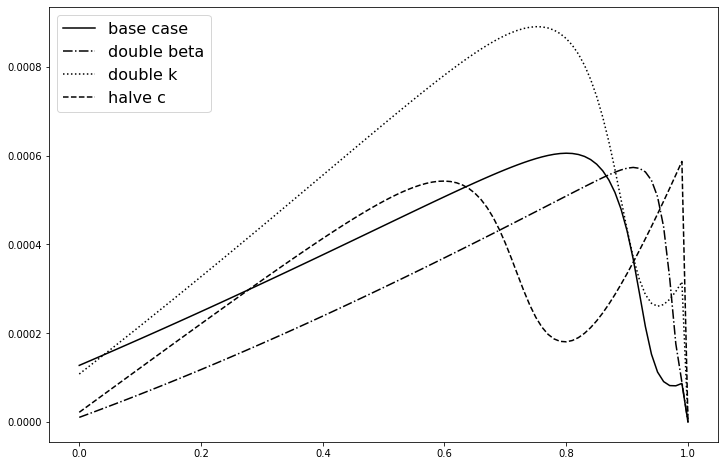

In [41]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))

fig = plt.figure(figsize = (12, 8))

plt.plot(x, H, 'k', label = 'base case')
plt.plot(x2, H2, 'k', linestyle = '-.', label = 'double beta')
plt.plot(x3, H3, 'k', linestyle = ':', label = 'double k')
plt.plot(x4, H4, 'k', linestyle = '--', label = 'halve c')
plt.legend(fontsize = 16)
plt.show()

# ax2.plot(x, H_sp)
# ax2.plot(x2, H_sp2)
# ax2.plot(x3, H_sp3)
# ax2.plot(x4, H_sp4)